In [ ]:
import pandas as pd
import numpy as np

In [11]:
import pandas as pd

# Load the Excel file
file_path = 'E-commerce_data.xlsx'

# List all sheet names
sheet_names = pd.ExcelFile(file_path).sheet_names
print("Sheet Names:", sheet_names)

# Load each sheet into a DataFrame
customers = pd.read_excel(file_path, sheet_name='customers')
genders = pd.read_excel(file_path, sheet_name='genders')
cities = pd.read_excel(file_path, sheet_name='cities')
transactions = pd.read_excel(file_path, sheet_name='transactions')
branches = pd.read_excel(file_path, sheet_name='branches')
merchants = pd.read_excel(file_path, sheet_name='merchants')

# Check the first few rows of each table
print("Customers Table:")
print(customers.head())

print("Genders Table:")
print(genders.head())

print("Cities Table:")
print(cities.head())

print("Transactions Table:")
print(transactions.head())

print("Branches Table:")
print(branches.head())

print("Merchants Table:")
print(merchants.head())

Sheet Names: ['customers', 'genders', 'cities', 'transactions', 'branches', 'merchants']
Customers Table:
   customer_id  join_date  city_id  gender_id
0            1 2022-01-08        7          1
1            2 2023-05-02       20          2
2            3 2023-05-14       15          1
3            4 2022-11-25       11          2
4            5 2023-04-26        8          1
Genders Table:
   gender_id gender_name
0          1        Male
1          2      Female
Cities Table:
   city_id         city_name
0        1             Cairo
1        2        Alexandria
2        3              Giza
3        4  Shubra El-Kheima
4        5         Port Said
Transactions Table:
   transaction_id  customer_id transaction_date transaction_status  \
0               1          733       2024-05-11         subscribed   
1               2          631       2023-05-15             burned   
2               3          309       2022-11-13         subscribed   
3               4          695       202

In [12]:
# Merge tables
df = pd.merge(customers, genders, on='gender_id', how='left')
df = pd.merge(df, cities, on='city_id', how='left')
df = pd.merge(df, transactions, on='customer_id', how='left')
df = pd.merge(df, branches, on='branch_id', how='left')
df = pd.merge(df, merchants, on='merchant_id', how='left')

# Check the merged DataFrame
print("Merged DataFrame:")
print(df.head())

Merged DataFrame:
   customer_id  join_date  city_id  gender_id gender_name city_name  \
0            1 2022-01-08        7          1        Male  Mansoura   
1            1 2022-01-08        7          1        Male  Mansoura   
2            1 2022-01-08        7          1        Male  Mansoura   
3            1 2022-01-08        7          1        Male  Mansoura   
4            1 2022-01-08        7          1        Male  Mansoura   

   transaction_id transaction_date transaction_status coupon_name  burn_date  \
0           178.0       2022-07-30         subscribed     SrP-866        NaT   
1           257.0       2022-09-19             burned     krI-075 2022-11-05   
2          1652.0       2022-06-09             burned     quk-137 2022-07-19   
3          1929.0       2022-07-30             burned     QiG-754 2022-10-18   
4          2352.0       2023-03-24         subscribed     OtC-985        NaT   

   branch_id  merchant_id                merchant_name  
0        8.0     

In [14]:

print("Missing Values:")
print(df.isnull().sum())


df = df.dropna()  # Drop rows with missing values

Missing Values:
customer_id           0
join_date             0
city_id               0
gender_id             0
gender_name           0
city_name             0
transaction_id        0
transaction_date      0
transaction_status    0
coupon_name           0
burn_date             0
branch_id             0
merchant_id           0
merchant_name         0
dtype: int64


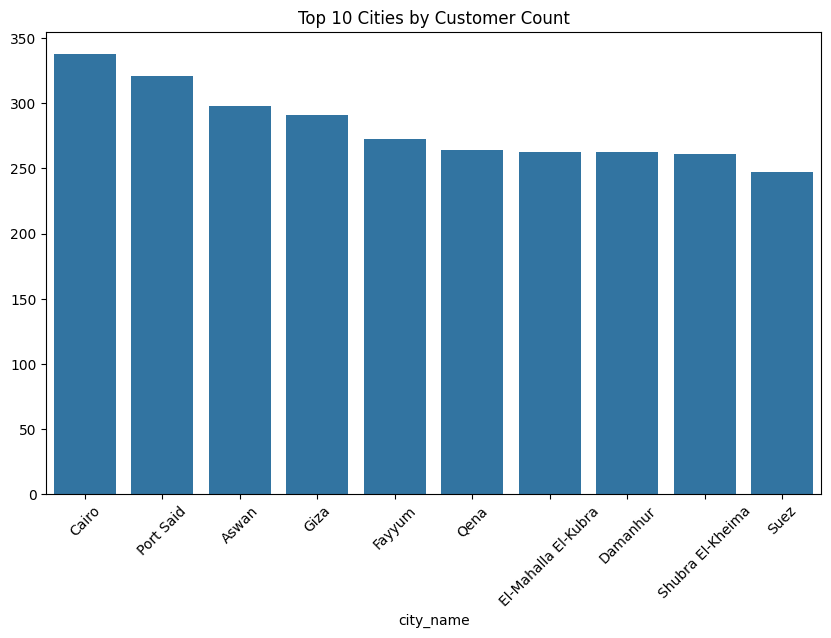

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

city_counts = df['city_name'].value_counts().head(10)  # Top 10 cities
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('Top 10 Cities by Customer Count')
plt.xticks(rotation=45)
plt.show()

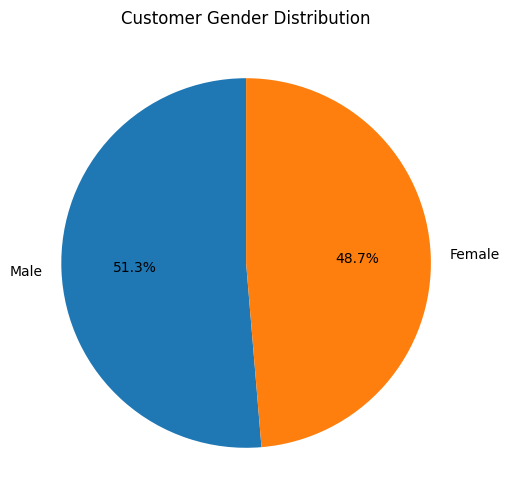

In [19]:
gender_counts = df['gender_name'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Gender Distribution')
plt.show()

<Figure size 1200x600 with 0 Axes>

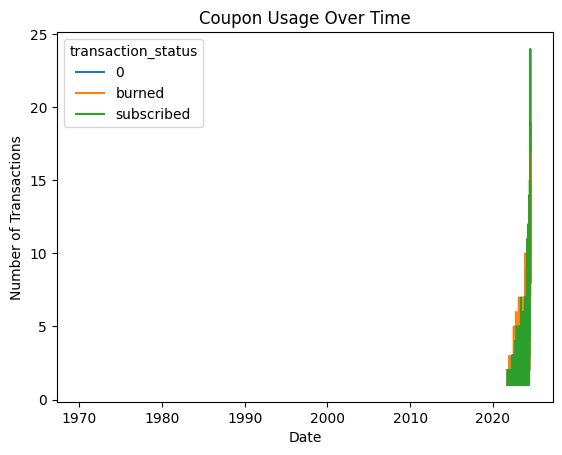

In [21]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])


coupon_usage = df.groupby([df['transaction_date'].dt.date, 'transaction_status']).size().unstack()
plt.figure(figsize=(12, 6))
coupon_usage.plot(kind='line')
plt.title('Coupon Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

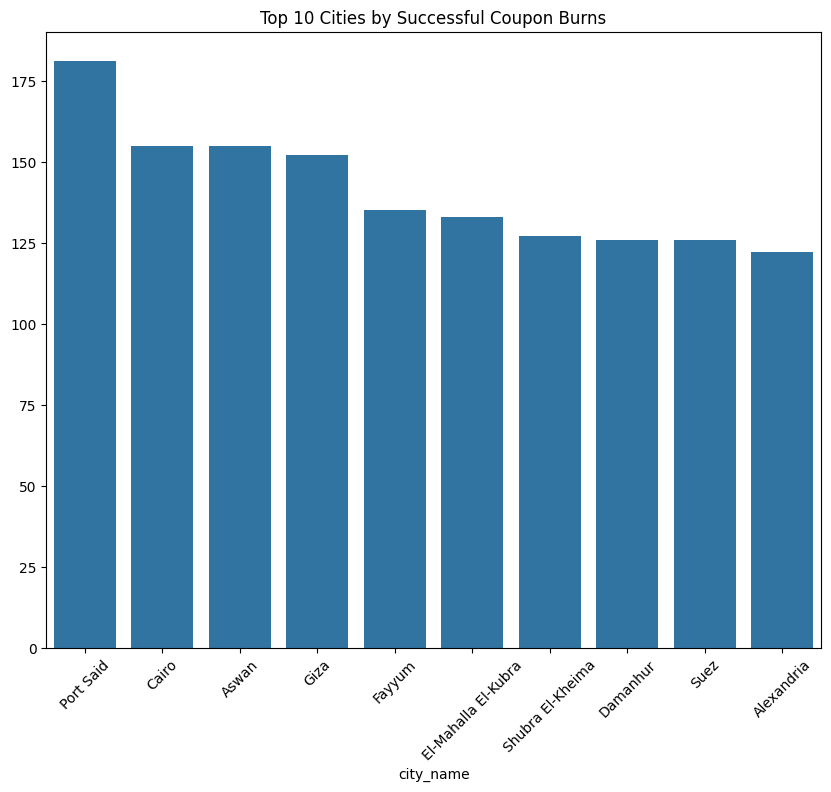

In [25]:

successful_burns = df[df['transaction_status'] == 'burned']
top_cities = successful_burns['city_name'].value_counts().head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Cities by Successful Coupon Burns')
plt.xticks(rotation=45)
plt.show()

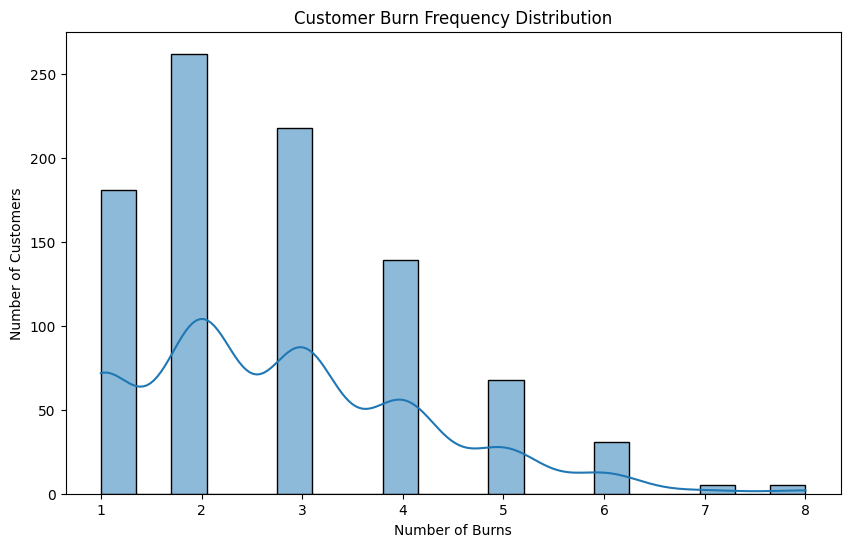

In [26]:

burn_frequency = df[df['transaction_status'] == 'burned'].groupby('customer_id').size()

plt.figure(figsize=(10, 6))
sns.histplot(burn_frequency, bins=20, kde=True)
plt.title('Customer Burn Frequency Distribution')
plt.xlabel('Number of Burns')
plt.ylabel('Number of Customers')
plt.show()

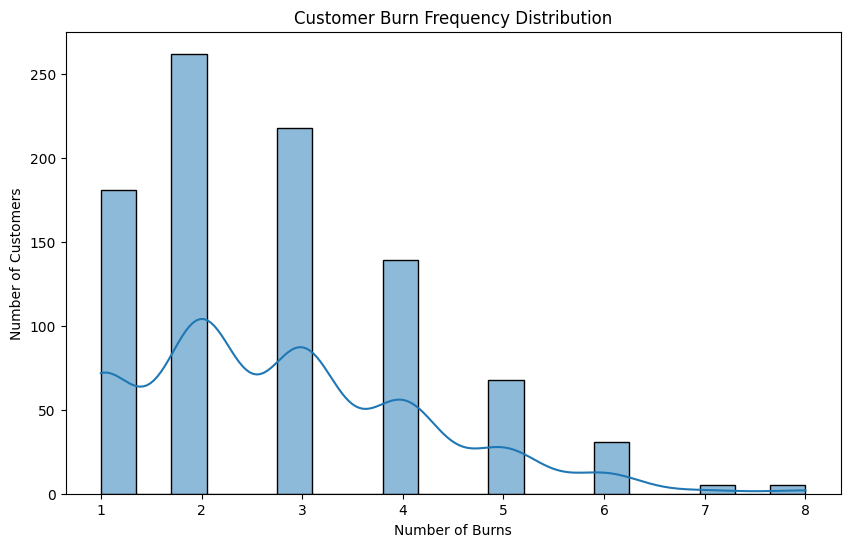

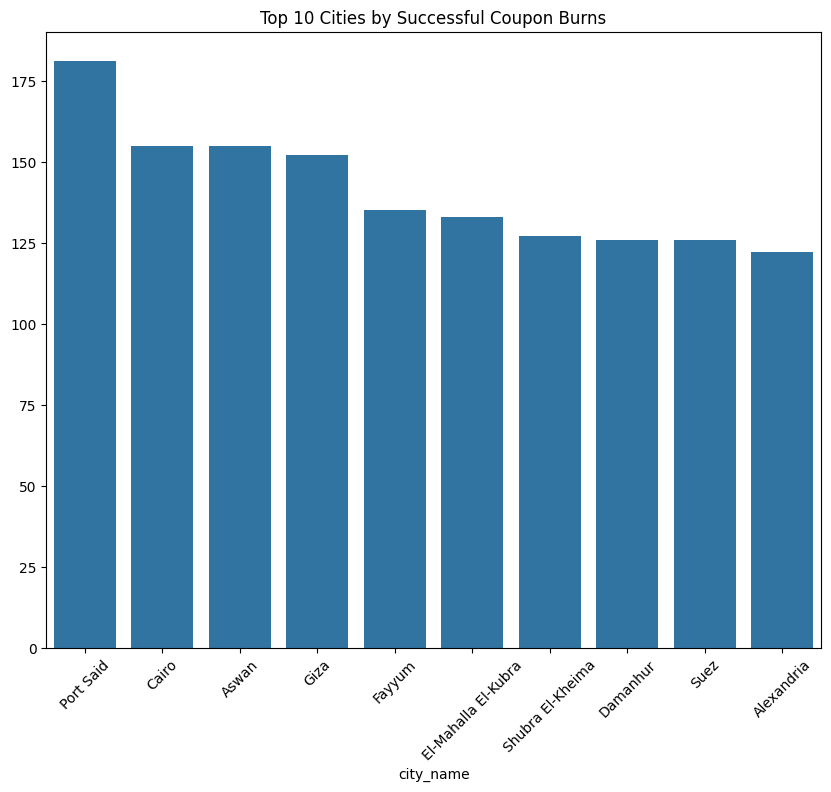

In [29]:
from matplotlib.backends.backend_pdf import PdfPages

# Create a PDF file
with PdfPages('dashboard.pdf') as pdf:
    # Add each plot to the PDF
    plt.figure(figsize=(6, 6))
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Customer Gender Distribution')
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=city_counts.index, y=city_counts.values)
    plt.title('Top 10 Cities by Customer Count')
    plt.xticks(rotation=45)
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(10, 6))
    sns.histplot(burn_frequency, bins=20, kde=True)
    plt.title('Customer Burn Frequency Distribution')
    plt.xlabel('Number of Burns')
    plt.ylabel('Number of Customers')
    plt.show()

    plt.figure(figsize=(10, 8))
    sns.barplot(x=top_cities.index, y=top_cities.values)
    plt.title('Top 10 Cities by Successful Coupon Burns')
    plt.xticks(rotation=45)
    plt.show()

Unsupervied part


In [30]:

features = df[['gender_id', 'city_id', 'transaction_status']]

# One-hot encode categorical features
features = pd.get_dummies(features, columns=['gender_id', 'city_id', 'transaction_status'])

# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

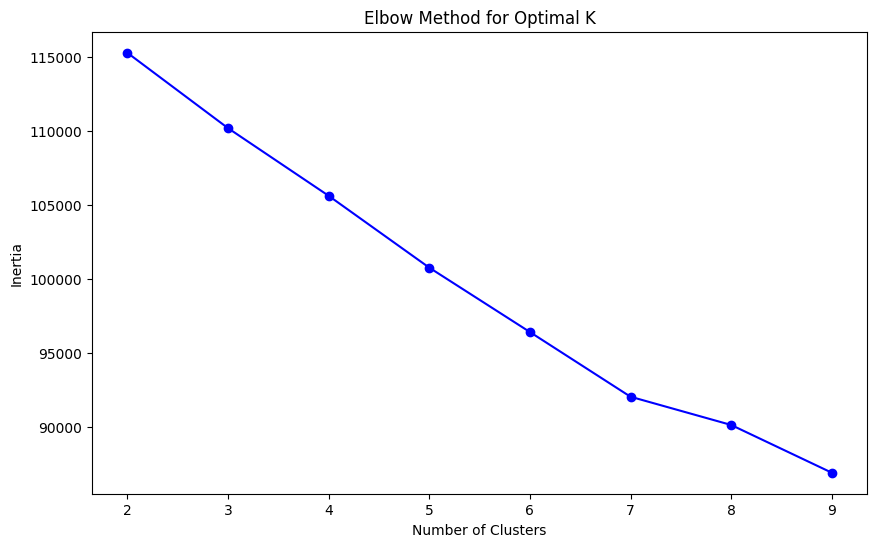

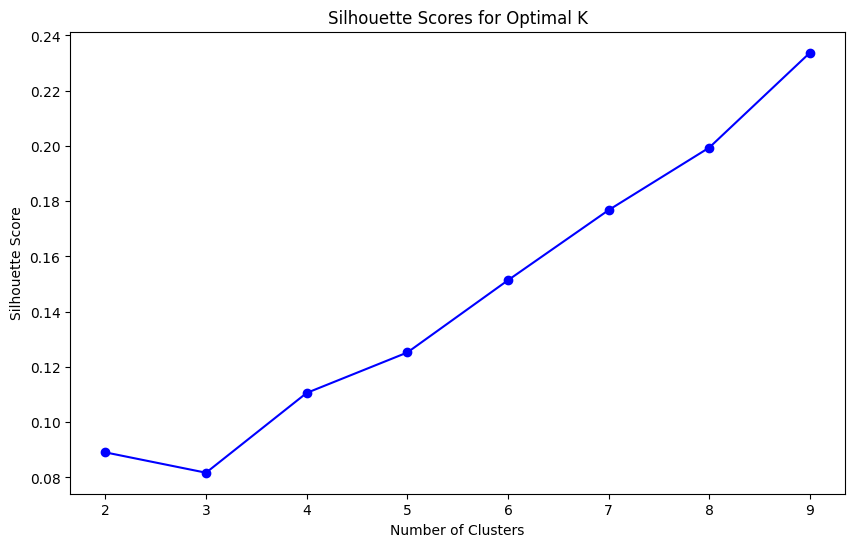

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


inertia = []
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal K')
plt.show()

# Train final model with optimal K
optimal_k = 4  # Example, choose based on plots
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

         gender_id    city_id transaction_status
cluster                                         
0         1.000000  10.546875         subscribed
1         1.380567   6.000000             burned
2         2.000000  10.091537         subscribed
3         1.496653  10.286192             burned


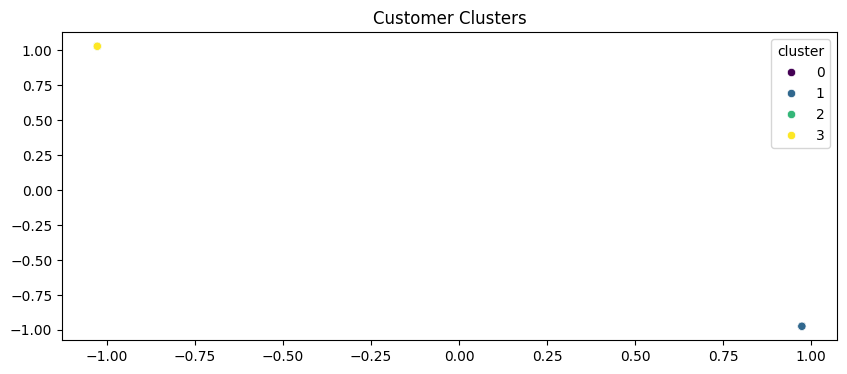

In [33]:
# Cluster analysis
cluster_summary = df.groupby('cluster').agg({
    'gender_id': 'mean',
    'city_id': 'mean',
    'transaction_status': lambda x: x.mode()[0]
})

print(cluster_summary)

# Visualize clusters
plt.figure(figsize=(10, 4))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=df['cluster'], palette='viridis')
plt.title('Customer Clusters')
plt.show()

In [34]:

for cluster in range(optimal_k):
    print(f"Cluster {cluster}:")
    print(f"- Gender: {cluster_summary.loc[cluster, 'gender_id']}")
    print(f"- City: {cluster_summary.loc[cluster, 'city_id']}")
    print(f"- Most Common Transaction Status: {cluster_summary.loc[cluster, 'transaction_status']}")
    print("Recommendation: Offer personalized coupons based on the above characteristics.")

Cluster 0:
- Gender: 1.0
- City: 10.546875
- Most Common Transaction Status: subscribed
Recommendation: Offer personalized coupons based on the above characteristics.
Cluster 1:
- Gender: 1.3805668016194332
- City: 6.0
- Most Common Transaction Status: burned
Recommendation: Offer personalized coupons based on the above characteristics.
Cluster 2:
- Gender: 2.0
- City: 10.09153713298791
- Most Common Transaction Status: subscribed
Recommendation: Offer personalized coupons based on the above characteristics.
Cluster 3:
- Gender: 1.496652719665272
- City: 10.286192468619246
- Most Common Transaction Status: burned
Recommendation: Offer personalized coupons based on the above characteristics.
